## Instructions  
This notebook simply prints and plots the outputs generated with `ex1.1/main`, `ex1.2/main` and `ex1.3/main`. To compile and run, simply do, in the directory of this notebook:

`make && ./run.sh`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1.1

## Part 1

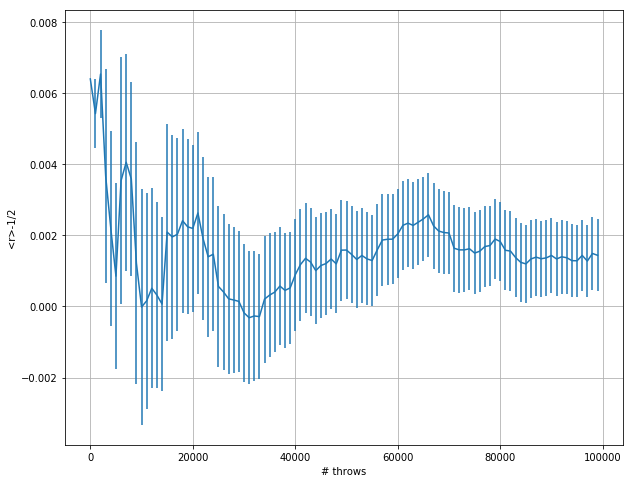

In [2]:
n, progress_sum, error = np.loadtxt("ex1.1/sampling.txt", delimiter="\t", unpack=True)
plt.figure(figsize=(10,8))
plt.errorbar(n, progress_sum-0.5,yerr=error)
plt.xlabel('# throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

## Part 2

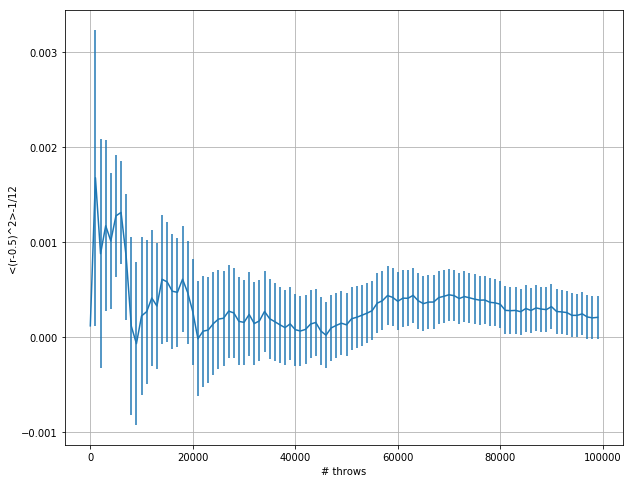

In [3]:
n, progress_sum, error = np.loadtxt("ex1.1/sampling2.txt", delimiter="\t", unpack=True)
plt.figure(figsize=(10,8))
plt.errorbar(n, progress_sum-1/12,yerr=error)
plt.xlabel('# throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

## Part 3

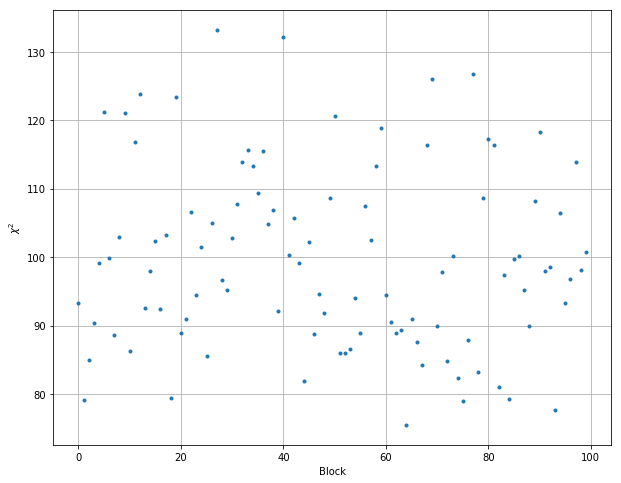

Mean value of chi^2 is:  99.5756


In [8]:
chi = np.loadtxt("ex1.1/chi.txt", delimiter="\t", unpack=True)
plt.figure(figsize=(10,8))
plt.plot(chi, linestyle="", marker=".")
plt.xlabel('Block')
plt.ylabel(r'$\chi^2$')
plt.grid(True)
plt.show()
print("Mean value of chi^2 is: ", np.mean(chi))

# Exercise 1.2

## Central limit theorem

1.41666


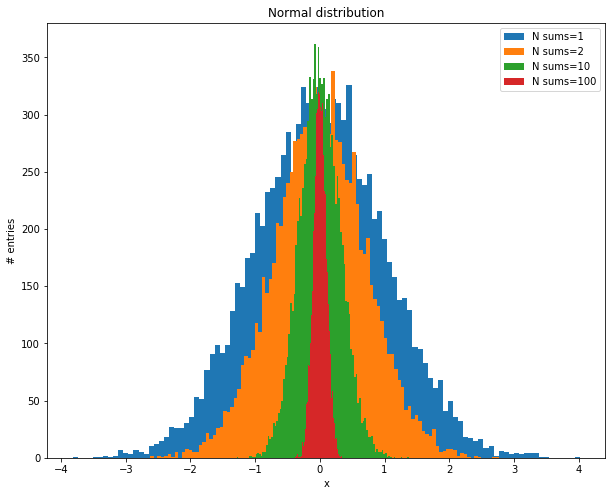

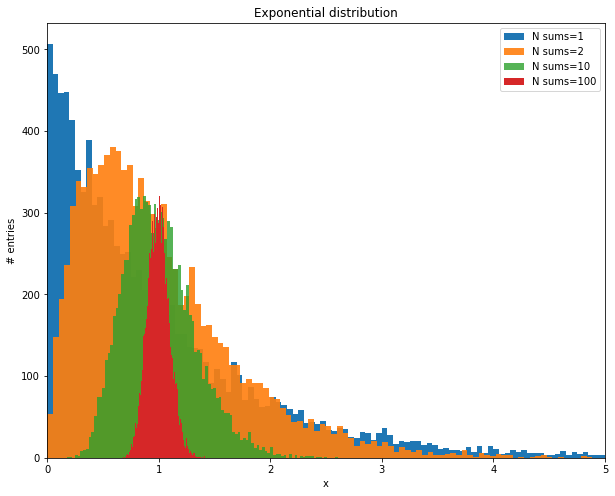

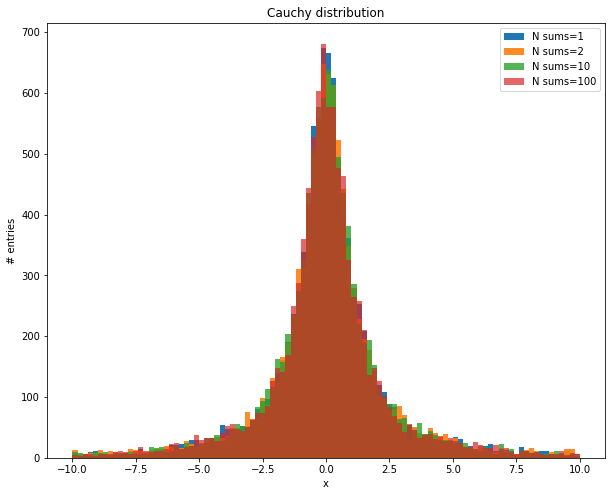

In [5]:
from scipy.optimize import curve_fit
#functions for fitting
def gauss(x,a,x0,sigma): 
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) 
def cauchy(x, i, x0, gamma): 
    return i*(gamma**2/((x-x0)**2+gamma**2)) 
#function for finding mean x value of a bin
def mean_bin(x):
    pass
    

gauss, expn, cauchy, gauss2, expn2, cauchy2, gauss10, expn10, cauchy10, gauss100, expn100, cauchy100=np.loadtxt("ex1.2/distributions.txt", delimiter="\t", unpack=True)

plt.figure(figsize=(10,8))
#plt.subplots(2,2)
n, bins, patch=plt.hist(gauss, bins=100,  label="N sums=1")
n, bins, patch=plt.hist(gauss2, bins=100,  label="N sums=2")
n, bins, patch=plt.hist(gauss10, bins=100,  label="N sums=10")
n, bins, patch=plt.hist(gauss100, bins=100, label="N sums=100")
plt.legend()
plt.xlabel("x")
plt.ylabel("# entries")
plt.title("Normal distribution")




fig=plt.figure(figsize=(10,8))
axes=fig.subplots()
axes.set_xlim([0,5])
#TODO ASK about normalization!
#plt.subplots(2,2)
n, bins, patch=plt.hist(expn, bins=100, alpha=1,label="N sums=1", range=(-0,5))
n, bins, patch=plt.hist(expn2, bins=100, alpha=0.9, label="N sums=2")
n, bins, patch=plt.hist(expn10, bins=100, alpha=0.8,  label="N sums=10")
n, bins, patch=plt.hist(expn100, bins=100,  label="N sums=100")
print(np.max(bins))

plt.legend()
plt.xlabel("x")
plt.ylabel("# entries")
plt.title("Exponential distribution")

plt.figure(figsize=(10,8))
#plt.subplots(2,2)
range=(-10,10)
n, bins, patch=plt.hist(cauchy, bins=100, range=range, label="N sums=1")
n, bins, patch=plt.hist(cauchy2, bins=100, range=range, alpha=0.9, label="N sums=2")
n, bins, patch=plt.hist(cauchy10, bins=100, range=range, alpha=0.8, label="N sums=10")
n, bins, patch=plt.hist(cauchy100, bins=100, range=range, alpha=0.7, label="N sums=100")
plt.xlabel("x")
plt.ylabel("# entries")
plt.title("Cauchy distribution")
plt.legend()
plt.show()

# Exercize 1.3

## Pi value

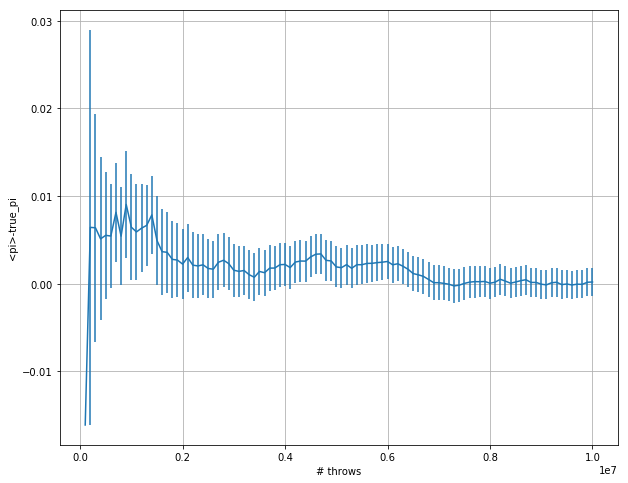

In [2]:
n, pi, err=np.loadtxt("ex1.3/pi.txt", delimiter="\t",unpack=True)
fig=plt.figure(figsize=(10,8))
ax=plt.subplot()
#ax.set_xscale("log", nonposx='clip')


plt.errorbar(n, pi-np.pi,yerr=err)
plt.grid(True)
plt.xlabel("# throws")
plt.ylabel("<pi>-true_pi")
plt.show()